# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.019986e+01     6.415347e+00
 * time: 0.0044231414794921875
     1     2.831209e+01     4.448695e+00
 * time: 0.013137102127075195
     2     2.583275e+01     1.022811e+01
 * time: 0.03416609764099121
     3     1.384585e+01     1.990758e+00
 * time: 0.0597841739654541
     4     1.239536e+01     2.121670e+00
 * time: 0.07690811157226562
     5     1.226511e+01     2.755857e+00
 * time: 0.09406709671020508
     6     1.130423e+01     2.544773e+00
 * time: 0.11131501197814941
     7     1.021935e+01     1.502595e+00
 * time: 0.1285231113433838
     8     9.611152e+00     8.976484e-01
 * time: 0.14575505256652832
     9     9.429629e+00     7.357015e-01
 * time: 0.1631331443786621
    10     9.417091e+00     1.049001e+00
 * time: 0.17612409591674805
    11     9.331661e+00     7.824204e-01
 * time: 0.1890239715576172
    12     9.259092e+00     8.441756e-01
 * time: 0.20196914672851562
    13     9.235012e+00     9.812133e-01
 * time: 

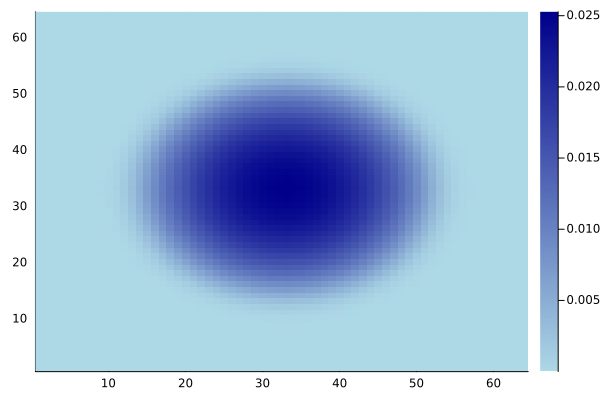

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)